In [132]:
import pandas as pd
from PIL import Image
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv("data/data.csv", dtype=str)
print(df.head())

                       title          id
0                   Eksi Bir   8960040_t
1  Mein Freund, der Deutsche   8595106_t
2                    Tähminä   1266112_t
3                     Sarhos   7147756_t
4              Tamiri Mümkün  24517988_t


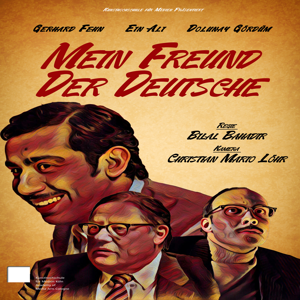

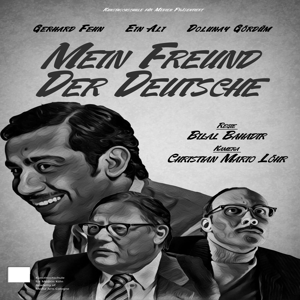

In [134]:
def display_image(image):
    plt.imshow(image.permute(1, 2, 0), cmap='gray')
    plt.axis('off')
    plt.show()
    
def display_image_from_id(image_id, color='c', size=(300, 300)):
    if color == 'b':
        image_path = "data/images_black/" + image_id + ".jpg"
        img = Image.open(image_path)
    else:
        image_path = "data/images_color/" + image_id + ".jpg"
        img = Image.open(image_path)

    # Resize the image to the specified size
    img = img.resize(size)

    display(img)
    
display_image_from_id('8595106_t', 'c')
display_image_from_id('8595106_t', 'b')

In [139]:
class PhotoDataset(Dataset):
    def __init__(self, root_dir='data/', df=None):
        self.root_dir = root_dir
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.root_dir, 'images_color', self.df['id'][idx] + '.jpg'))
        label = Image.open(os.path.join(self.root_dir, 'images_black', self.df['id'][idx] + '.jpg'))

        return image, label

# Custom collate function to handle PIL images with resizing
def custom_collate(batch):
    images, labels = zip(*batch)

    # Resize or pad images to a consistent size
    target_size = (256, 256)
    images = [transforms.Resize(target_size)(image) for image in images]
    labels = [transforms.Resize(target_size)(label) for label in labels]

    images = [transforms.ToTensor()(image) for image in images]
    labels = [transforms.ToTensor()(label) for label in labels]

    return torch.stack(images), torch.stack(labels)

photo_dataset = PhotoDataset(df=df)
batch_size = 4
dataloader = DataLoader(photo_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)

for idx, batch in enumerate(dataloader):

    plt.figure(figsize=(15, 5))

    for i in range(batch[0].size(0)):
        # Display input image
        plt.subplot(2, batch[0].size(0), i + 1)
        plt.imshow(batch[0][i].permute(1, 2, 0), cmap='gray')
        plt.axis("off")

        # Display corresponding label
        plt.subplot(2, batch[0].size(0), i + 1 + batch[0].size(0))
        plt.imshow(batch[1][i].permute(1, 2, 0), cmap='gray')
        plt.axis("off")

    plt.show()

    if idx == 1:
        break


IndexError: tuple index out of range